In [128]:
import sqlite3
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text


database_file = 'final_project.db'
conn = sqlite3.connect(database_file)

engine = create_engine(f'sqlite:///{database_file}')

df1 = pd.read_csv('Firearm_Provisions.csv')
df2 = pd.read_csv('Gun_Violence_Data.csv')
df3 = pd.read_csv('Mass_Shooters.csv')
df4 = pd.read_csv('Mass_Shootings.csv')
df5 = pd.read_csv('Mortality_By_State.csv')
df6 = pd.read_csv('high_risk_locations_refined.csv')



#write df to new table in db
df1.to_sql('Firearm_Provisions', con=engine, if_exists='replace', index=False)
df2.to_sql('Gun_Violence', con=engine, if_exists='replace', index=False)
df3.to_sql('Mass_Shooters', con=engine, if_exists='replace', index=False)
df4.to_sql('Mass_Shootings', con=engine, if_exists='replace', index=False)
df5.to_sql('Mortality_By_State', con=engine, if_exists='replace', index=False)
df6.to_sql('Risk', con=engine, if_exists='replace', index=False)


222582

In [129]:
#adding population table
df7 = pd.read_csv('PopulationReport.csv')
#add average column to population dataset
df7['Average_Population'] = df7.iloc[:, 1:].mean(axis=1)

df7.to_sql('Population', con=engine, if_exists='replace', index=False)



55

In [130]:
#verifying tables are added
#verify tables are added: print a row from each
with engine.connect() as conn:
    result = conn.execute(text(f'SELECT * FROM {'Firearm_Provisions'} LIMIT 1'))
    for row in result:
        print(row)
    result = conn.execute(text(f'SELECT * FROM {'Gun_Violence'} LIMIT 1'))
    for row in result:
        print(row)
    result = conn.execute(text(f'SELECT * FROM {'Mass_Shooters'} LIMIT 1'))
    for row in result:
        print(row)
    result = conn.execute(text(f'SELECT * FROM {'Mass_Shootings'} LIMIT 1'))
    for row in result:
        print(row)
    result = conn.execute(text(f'SELECT * FROM {'Mortality_By_State'} LIMIT 3'))
    for row in result:
        print(row)
    result = conn.execute(text(f'SELECT * FROM {'Population'} LIMIT 3'))
    for row in result:
        print(row)

(1, 'AL', 1991, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 15)
(461105, 'PA', 0, 4, 2013)
(4, 1968, 'MI', 22, 5, 'Restaurant / bar / nightclub', 0, 7, 2, 56, 0, 'Male', 1.0, '1', 'Homicide', '0', 'No evidence', 1.0, 'Yes', 0, 'No evidence', 0.0, 0, 'No evidence', 1, 'Problem with alcohol', 0.0, 'No evidence that symptoms of psychosis played a role in the shooting', 1.0, 1)
(1, 'NV', 64, 60, 867, 2017, 1, 0)
(1, 2022, 'AL', 25.5, 1278)
(2, 2022, 'AK', 22.4, 164)
(3, 2022, 'AZ', 20.1, 1535)
('United States', 248790925.0, 281424600.0, 308758105.0, 331464948.0, 334914895.0, 301070694.6)
('AL', 4040389.0, 4447207.0, 4780118.0, 5024294.0, 510

In [141]:
query = """
SELECT fp.state, fp.year, fp.lawtotal
FROM Firearm_Provisions AS fp
JOIN (
    SELECT year, MAX(lawtotal) AS mx
    FROM Firearm_Provisions
    GROUP BY year
) AS temp
ON fp.year = temp.year
AND fp.lawtotal = temp.mx
ORDER BY fp.year DESC;

"""

highest_lawtotal_by_year = pd.read_sql_query(query, engine)
most_frequent_state = highest_lawtotal_by_year['state'].mode()[0]
print('The following lists the state with the highest law total by year. Since 1991, either Massachusetts or California have had the highest number of firearm provisions in place for that year.')
highest_lawtotal_by_year



The following lists the state with the highest law total by year. Since 1991, either Massachusetts or California have had the highest number of firearm provisions in place for that year.


,state,year,lawtotal
0,CA,2017,106
1,CA,2016,104
2,CA,2015,102
3,CA,2014,100
4,MA,2014,100
5,MA,2013,100
6,MA,2012,100
7,MA,2011,100
8,MA,2010,100
9,MA,2009,100


In [142]:
query = """
SELECT fp.state, fp.year, fp.lawtotal
FROM Firearm_Provisions AS fp
JOIN (
    SELECT year, MIN(lawtotal) AS mn
    FROM Firearm_Provisions
    GROUP BY year
) AS temp
ON fp.year = temp.year
AND fp.lawtotal = temp.mn
ORDER BY fp.year DESC;

"""

lowest_lawtotal_by_year = pd.read_sql_query(query, engine)
most_frequent_state = lowest_lawtotal_by_year['state'].mode()[0]
print('The following lists the state with the lowest law total by year. Since 1991, Vermont, Montana, Arkansas, and Idaho (in that order) have had the lowest number of firearm provisions in place for that year.')
lowest_lawtotal_by_year


The following lists the state with the lowest law total by year. Since 1991, Vermont, Montana, Arkansas, and Idaho (in that order) have had the lowest number of firearm provisions in place for that year.


,state,year,lawtotal
0,AK,2017,4
1,ID,2017,4
2,MT,2017,4
3,AK,2016,4
4,ID,2016,4
5,MT,2016,4
6,AK,2015,4
7,MT,2015,4
8,VT,2014,3
9,VT,2013,3


In [136]:
#i want to know the law total of the state that had the highest death rate for each year
query = """
SELECT mbs.STATE, mbs.YEAR, mbs.RATE, fp.lawtotal
FROM Mortality_By_State as MBS
JOIN(
SELECT YEAR, MAX(RATE) as max_rate
FROM Mortality_By_State
GROUP BY YEAR
)
AS temp
ON mbs.YEAR = temp.YEAR AND mbs.RATE = temp.max_rate
LEFT JOIN Firearm_Provisions AS fp
ON mbs.STATE = fp.state AND mbs.YEAR = fp.year;
"""
print("The following lists the state with the highest mortality rate by year along with the state's corresponding law total.")
mortality_rates = pd.read_sql_query(query, engine)
print(mortality_rates)

The following lists the state with the highest mortality rate by year along with the state's corresponding law total.
  STATE  YEAR  RATE  lawtotal
0    MS  2022  29.6       NaN
1    MS  2021  33.9       NaN
2    MS  2020  28.6       NaN
3    AK  2019  24.4       NaN
4    MS  2018  22.9       NaN
5    AK  2017  24.5       4.0
6    AK  2016  23.3       4.0
7    AK  2015  23.4       4.0
8    AK  2014  19.2       4.0


In [137]:


query = """
WITH 
avg_lt AS (
    SELECT state, AVG(lawtotal) AS average_lawtotal
    FROM Firearm_Provisions
    GROUP BY state
),
state_freq_ms AS (
    SELECT State, 
           COUNT(*) as total_mass_shootings
    FROM Mass_Shootings
    GROUP BY state
),
pop AS (
    SELECT Name, Average_Population
    FROM Population
)
SELECT sf.State, sf.total_mass_shootings, p.Average_Population, 
    (sf.total_mass_shootings * 100000.0 / p.Average_Population) AS Mass_Shootings_Per_100k,
    al.average_lawtotal
FROM state_freq_ms AS sf
JOIN avg_lt AS al ON sf.State = al.state 
JOIN pop AS p ON sf.state = p.Name
ORDER BY Mass_Shootings_Per_100k DESC;

"""
print("The following displays the \"rate\" of shootings per state, that is, the number of shootings that occurred in the state overall divided by the average population. The corresponding law totals are displayed as well" )
mass_shootings_highest_rate = pd.read_sql_query(query, engine)
mass_shootings_highest_rate

The following displays the "rate" of shootings per state, that is, the number of shootings that occurred in the state overall divided by the average population. The corresponding law totals are displayed as well


,State,total_mass_shootings,Average_Population,Mass_Shootings_Per_100k,average_lawtotal
0,AK,3,670800.4,0.447227,6.296296
1,CO,9,4855439.0,0.185359,16.888889
2,AR,4,2803833.6,0.142662,12.481481
3,KY,6,4220173.2,0.142174,6.888889
4,NV,3,2439880.2,0.122957,9.740741
5,WA,8,6600727.4,0.121199,25.407407
6,KS,3,2779602.8,0.107929,11.074074
7,OR,4,3713116.2,0.107726,22.481481
8,MS,3,2857870.8,0.104973,8.074074
9,RI,1,1059605.2,0.094375,43.407407


                         Mass_Shootings_Per_100k  average_lawtotal
Mass_Shootings_Per_100k                 1.000000         -0.166766
average_lawtotal                       -0.166766          1.000000


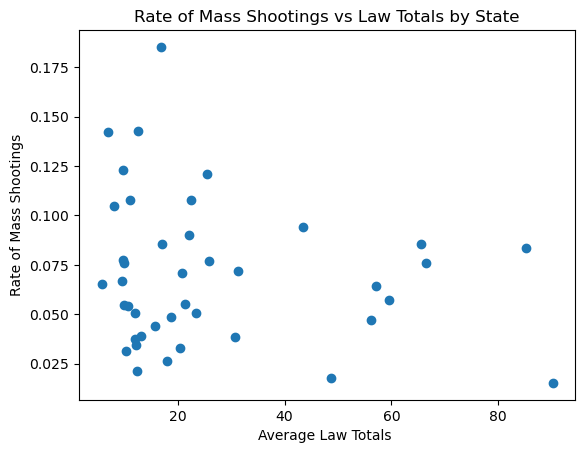

In [138]:
import matplotlib.pyplot as plt

mass_shootings_highest_rate = mass_shootings_highest_rate.iloc[1:]


correlation = mass_shootings_highest_rate[['Mass_Shootings_Per_100k', 'average_lawtotal']].corr()
print(correlation)

plt.scatter(mass_shootings_highest_rate['average_lawtotal'],mass_shootings_highest_rate['Mass_Shootings_Per_100k'], marker='o')
plt.title('Rate of Mass Shootings vs Law Totals by State')
plt.xlabel('Average Law Totals ')
plt.ylabel('Rate of Mass Shootings')
plt.show()

In [139]:


query = """
WITH 
avg_lt AS (
    SELECT state, AVG(lawtotal) AS average_lawtotal
    FROM Firearm_Provisions
    GROUP BY state
),
state_freq_ms AS (
    SELECT state, 
           SUM(COALESCE(n_killed, 0)) AS total_deaths,
           SUM(COALESCE(n_injured, 0)) AS total_injured,
           SUM(COALESCE(n_killed, 0) + COALESCE(n_injured, 0)) AS state_freq
    FROM Gun_Violence
    GROUP BY state
),
pop AS (
    SELECT Name, Average_Population
    FROM Population
)
SELECT sf.state, sf.total_deaths, sf.total_injured,sf.state_freq, p.Average_Population, (sf.state_freq * 100000.0 / p.Average_Population) AS Incidents_Per_100k,al.average_lawtotal
FROM state_freq_ms AS sf
JOIN avg_lt AS al ON sf.state = al.state 
JOIN pop AS p ON sf.state = p.Name
ORDER BY Incidents_Per_100k DESC;

"""
print("The following displays the \"rate\" of gun related deaths or injuries per state, that is, the number of shootings that occurred in the state overall and compared across populations. The corresponding law totals are displayed as well")

gun_violence_highest_rate = pd.read_sql_query(query, engine)
gun_violence_highest_rate

The following displays the "rate" of gun related deaths or injuries per state, that is, the number of shootings that occurred in the state overall and compared across populations. The corresponding law totals are displayed as well


,state,total_deaths,total_injured,state_freq,Average_Population,Incidents_Per_100k,average_lawtotal
0,LA,2179,4398,6577,4491179.0,146.442616,9.666667
1,IL,3409,13514,16923,12409051.8,136.376254,57.111111
2,DE,217,853,1070,873902.0,122.439358,25.370370
3,MS,1176,1883,3059,2857870.8,107.037729,8.074074
4,AL,1880,2998,4878,4680095.2,104.228649,12.407407
5,SC,1610,3084,4694,4523133.6,103.777611,15.740741
6,TN,1824,4478,6302,6190037.2,101.808758,18.703704
7,MO,2136,3585,5721,5810690.2,98.456462,12.148148
8,AK,267,325,592,670800.4,88.252780,6.296296
9,MD,1691,3167,4858,5641738.6,86.108208,48.666667


                    Incidents_Per_100k  average_lawtotal
Incidents_Per_100k            1.000000         -0.110557
average_lawtotal             -0.110557          1.000000


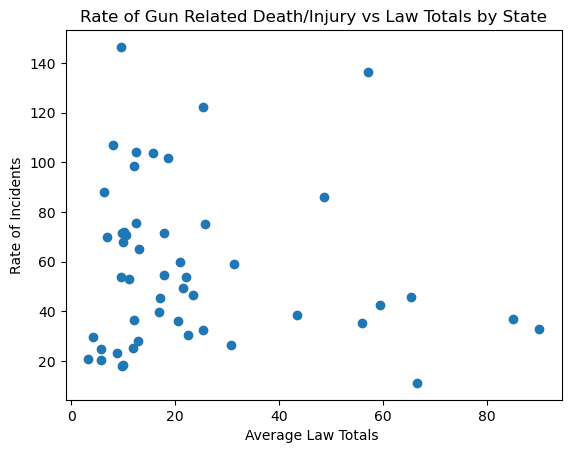

In [140]:
mass_shootings_highest_rate 

correlation = gun_violence_highest_rate[['Incidents_Per_100k', 'average_lawtotal']].corr()
print(correlation)

plt.scatter(gun_violence_highest_rate['average_lawtotal'],gun_violence_highest_rate['Incidents_Per_100k'], marker='o')
plt.title('Rate of Gun Related Death/Injury vs Law Totals by State')
plt.xlabel('Average Law Totals ')
plt.ylabel('Rate of Incidents')
plt.show()